In [ ]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/hapdf.csv')


In [ ]:
df

,Unnamed: 0,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,Afghanistan,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,2015
1,1,Albania,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,2015
2,2,Algeria,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2015
3,3,Angola,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,2015
4,4,Argentina,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2015
...,...,...,...,...,...,...,...,...,...,...,...
776,777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
777,778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
778,779,Afghanistan,154,3.203,0.35000,0.51700,0.36100,NaN,0.02500,0.15800,2019
779,780,Central African Republic,155,3.083,0.02600,NaN,0.10500,0.22500,0.03500,0.23500,2019


In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df.drop(['Year', 'Country', 'Happiness Rank'], axis = 1, inplace = True)

In [ ]:
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
1,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272
2,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822
3,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344
4,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451
...,...,...,...,...,...,...,...
776,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
777,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
778,3.203,0.35000,0.51700,0.36100,NaN,0.02500,0.15800
779,3.083,0.02600,NaN,0.10500,0.22500,0.03500,0.23500


In [ ]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]


In [ ]:
#fill empty spaces w median
df['Economy (GDP per Capita)'].fillna(df['Economy (GDP per Capita)'].median(), inplace=True)
df['Family'].fillna(df['Family'].median(), inplace=True)
df['Health (Life Expectancy)'].fillna(df['Health (Life Expectancy)'].median(), inplace=True)
df['Freedom'].fillna(df['Freedom'].median(), inplace=True)
df['Trust (Government Corruption)'].fillna(df['Trust (Government Corruption)'].median(), inplace=True)
df['Generosity'].fillna(df['Generosity'].median(), inplace=True)

In [ ]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
score

[-1277.4585859796048,
 -480.8883428104442,
 -300.49960025488065,
 -231.20687654111316,
 -189.623717720886,
 -172.27289237640747,
 -159.4276303207992,
 -149.85079078852112,
 -142.9526088818829]

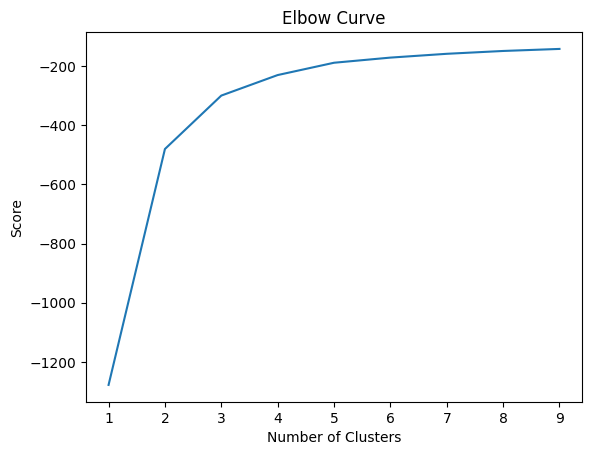

In [ ]:
#use the eblow technique
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [ ]:
#### Based on the elbow, the optimal number of clusters is 3. After value of 3 on the x-axis the curve flattens out.

In [ ]:
#k means clusters!!!
kmeans = KMeans(n_clusters = 3,)

In [ ]:
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
df['clusters'] = kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,clusters
0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,2
1,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,0
2,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,0
3,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,2
4,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,1


In [ ]:
df['clusters'].value_counts()

0    307
2    278
1    196
Name: clusters, dtype: int64

# Plotting clusters below.

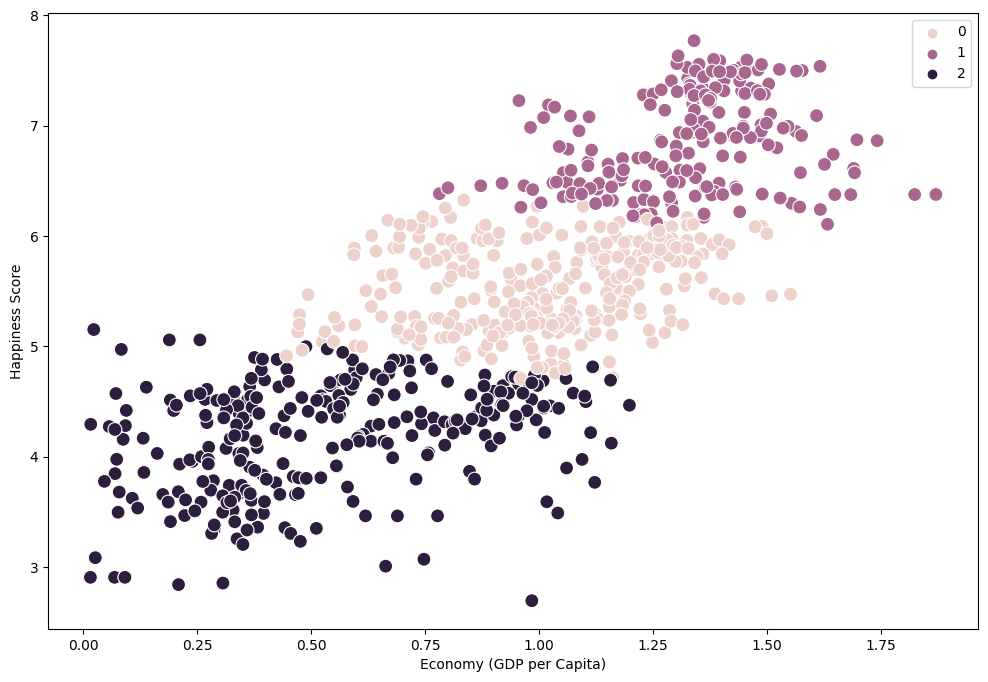

In [ ]:


plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Economy (GDP per Capita)'], y = df['Happiness Score'], hue = kmeans.labels_, s = 100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

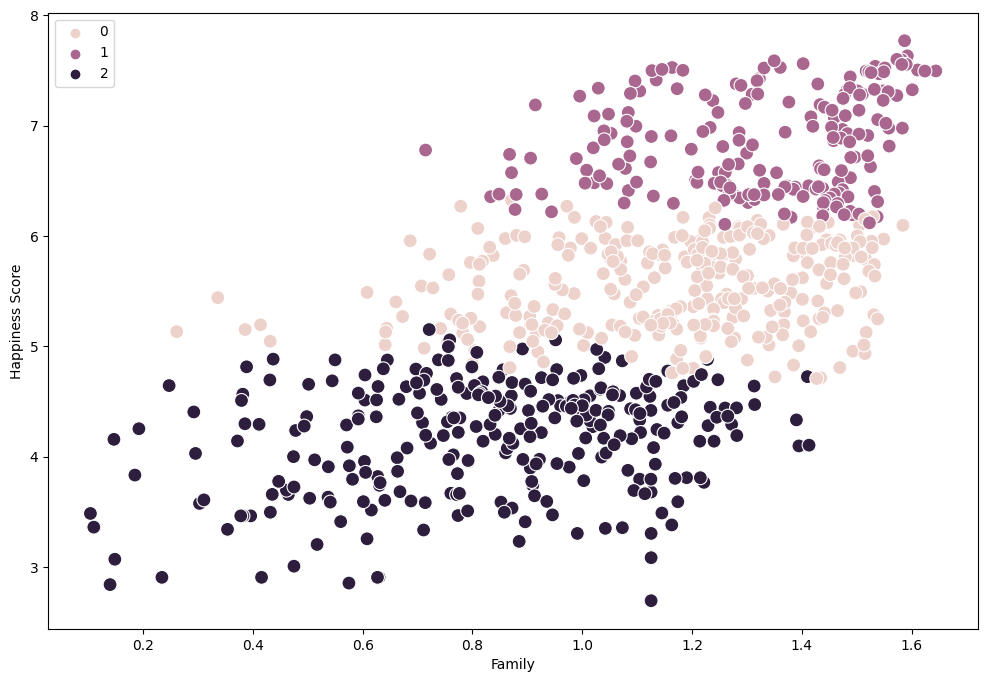

In [ ]:

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Family'], y = df['Happiness Score'], hue = kmeans.labels_, s = 100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.show()

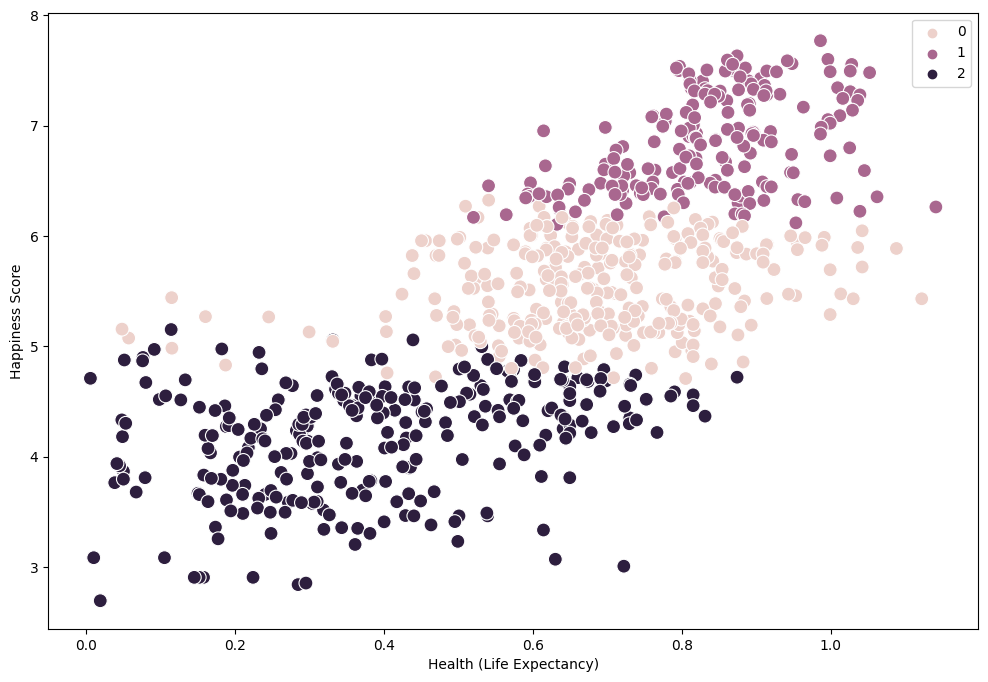

In [ ]:


plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Health (Life Expectancy)'], y = df['Happiness Score'], hue = kmeans.labels_, s = 100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.show()

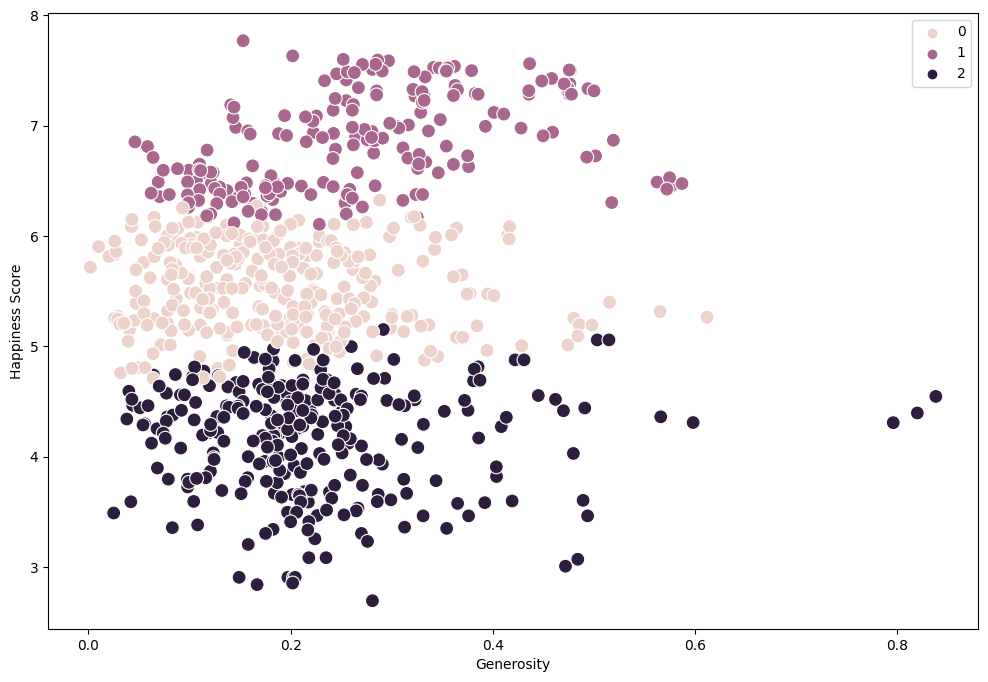

In [ ]:

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Generosity'], y = df['Happiness Score'], hue = kmeans.labels_, s = 100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

#**observations**

The pink cluster, clusters 0, seem to be doing the best.

In the Economy v. Happiness Score graph, it is best represented between 0.5 and 1.50. economy score and 5 - 6.5 happiness score.

In the family v. Happiness Score, it is best represented 5.5 - 6 happiness score and about 0.6 - 1.6 family score.

In the health v. Happiness Score, it is best represented 0 - 1 health score and 5-6 happiness score.

In the family v. Happiness Score, it is best represented 5.5 - 6 happiness score and about 0.6 - 1.6 family score.

In the generosity v. happiness score, it is best represnted between 0 - 0.6 generosity and 5-6 happiness score.


In [ ]:
#Descriptive statistics
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [ ]:
df.groupby('cluster').agg({'Economy (GDP per Capita)':['mean', 'median'],
                         'Family':['mean', 'median'],
                         'Health (Life Expectancy)':['mean', 'median'],
                           'Generosity':['mean', 'median'],
                          'Happiness Score':['mean', 'median']})

Economy (GDP per Capita)              Family            \
                                mean    median      mean    median   
cluster                                                              
dark purple                 0.532708  0.483830  0.835153  0.861865   
pink                        1.011251  1.024000  1.160627  1.205000   
purple                      1.329726  1.342765  1.324840  1.369240   

            Health (Life Expectancy)           Generosity            \
                                mean    median       mean    median   
cluster                                                               
dark purple                 0.389137  0.365500   0.222551  0.203505   
pink                        0.683435  0.684000   0.187242  0.175000   
purple                      0.834138  0.838177   0.267346  0.261000   

            Happiness Score          
                       mean  median  
cluster                              
dark purple        4.167360  4.2860  
pink               5.535101  5.5250  
purple             6.846000  6.8385

#next steps
The k means clustering showed us that happiness scores in the average reange of about 5-6 where generally reliable when it came to a certain range of correlated happiness variable.

however, regression analysis / supervised ML was far more helpful in developing insights.